# Visitor Pattern Analysis and Segmentation

**Objective**: Perform comprehensive EDA on visitor demographics and behaviors, cluster visitors into segments (Unsupervised Learning), and build a classifier to predict event preferences (Supervised Learning).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Configuration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading
Loading the visitor logs dataset.

In [2]:
df = pd.read_csv('../visitor_data.csv')
df.head()

,visit_date,visitor_name,age,country,event_selected,tickets_count,total_spend_usd
0,2023-07-17,Visitor_40060,53,Sri Lanka,General Entry,2,2
1,2024-05-19,Visitor_87702,20,Sri Lanka,Bottle Feeding (Morning),2,2
2,2023-03-11,Visitor_69730,40,Sri Lanka,General Entry,1,1
3,2023-03-10,Visitor_10046,61,Germany,Bottle Feeding (Afternoon),3,45
4,2023-03-03,Visitor_19066,53,China,General Entry,3,45


## 2. Exploratory Data Analysis (EDA)

### 2.1 Visitor Demographics (Country & Age)
Understanding who visits the orphanage.

/var/folders/jn/xf4lp_l92pgdxbgfnbyl9l8w0000gn/T/ipykernel_38822/1542309466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0], palette='coolwarm')


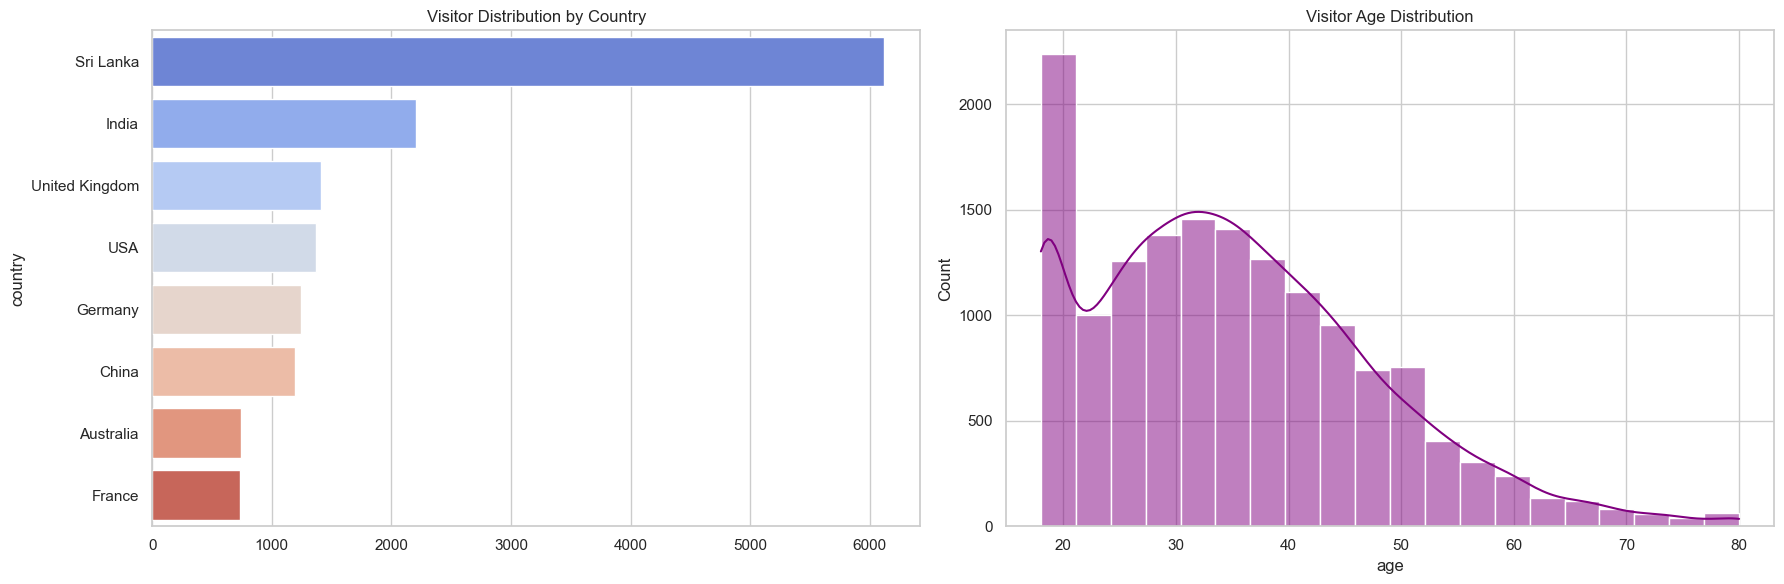

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Country Distribution
country_counts = df['country'].value_counts()
sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0], palette='coolwarm')
axes[0].set_title('Visitor Distribution by Country')

# Age Distribution
sns.histplot(df['age'], kde=True, bins=20, ax=axes[1], color='purple')
axes[1].set_title('Visitor Age Distribution')

plt.tight_layout()
plt.show()

### 2.2 Event Preferences by Demographics
Analyzing which events are popular among different countries.

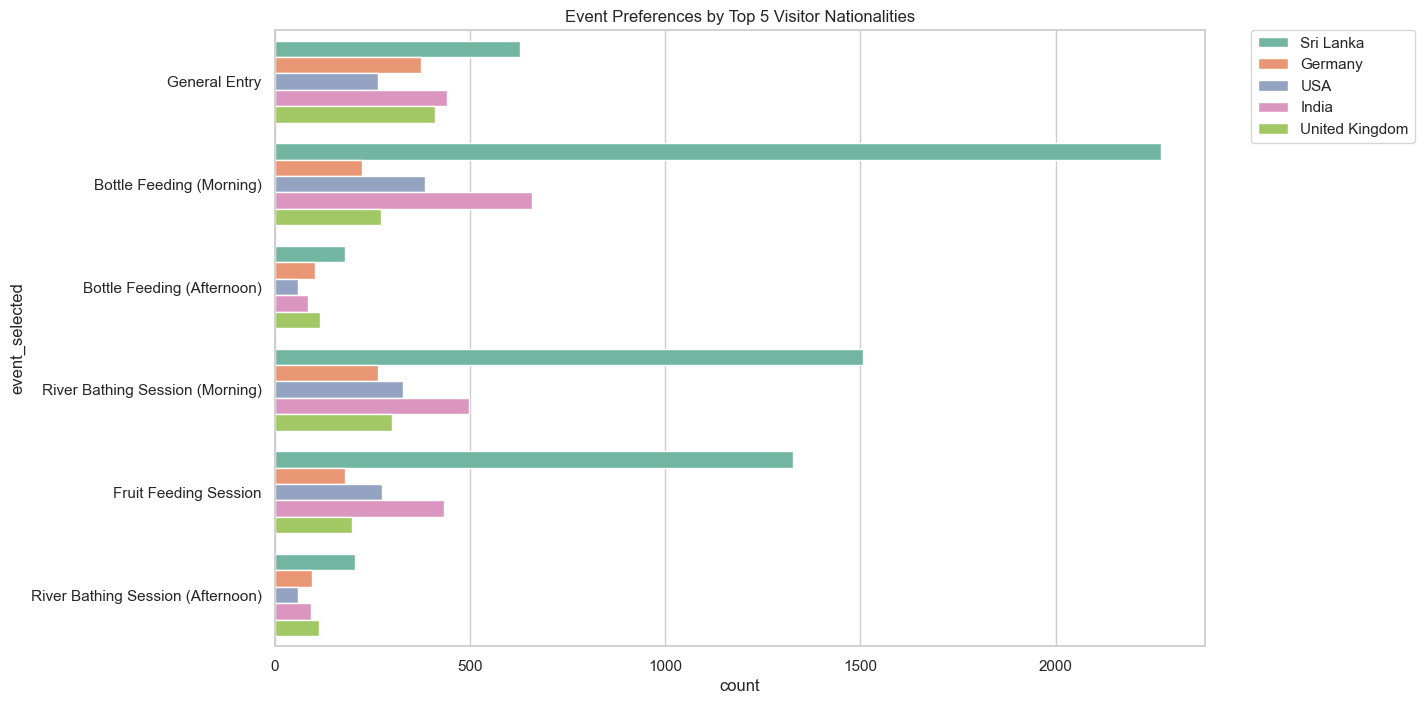

In [4]:
plt.figure(figsize=(12,8))
top_countries = df['country'].value_counts().nlargest(5).index
filtered_df = df[df['country'].isin(top_countries)]

sns.countplot(data=filtered_df, y='event_selected', hue='country', palette='Set2')
plt.title('Event Preferences by Top 5 Visitor Nationalities')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2.3 Ticket Spending Analysis
Relationship between Age and Spending.

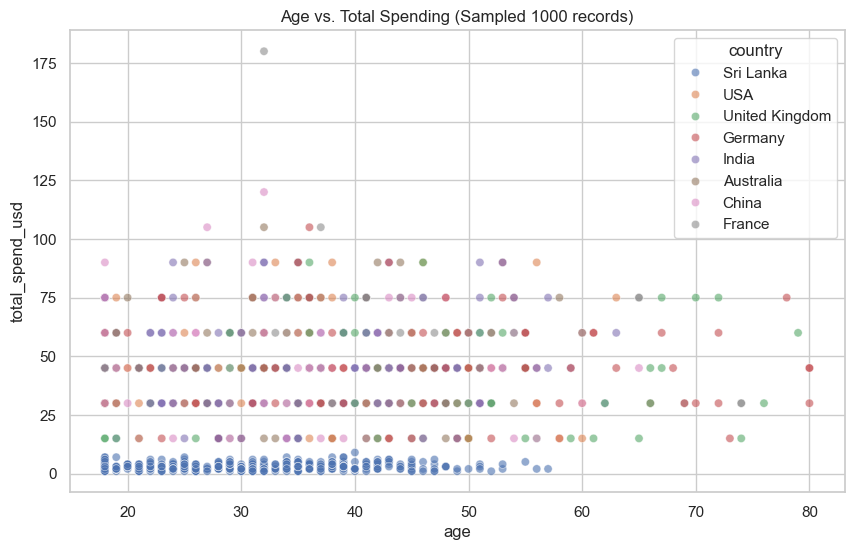

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(1000), x='age', y='total_spend_usd', hue='country', alpha=0.6)
plt.title('Age vs. Total Spending (Sampled 1000 records)')
plt.show()

## 3. Visitor Segmentation (Clustering)
Using K-Means to identify distinct visitor segments based on Age, Country, and Ticket Counts.

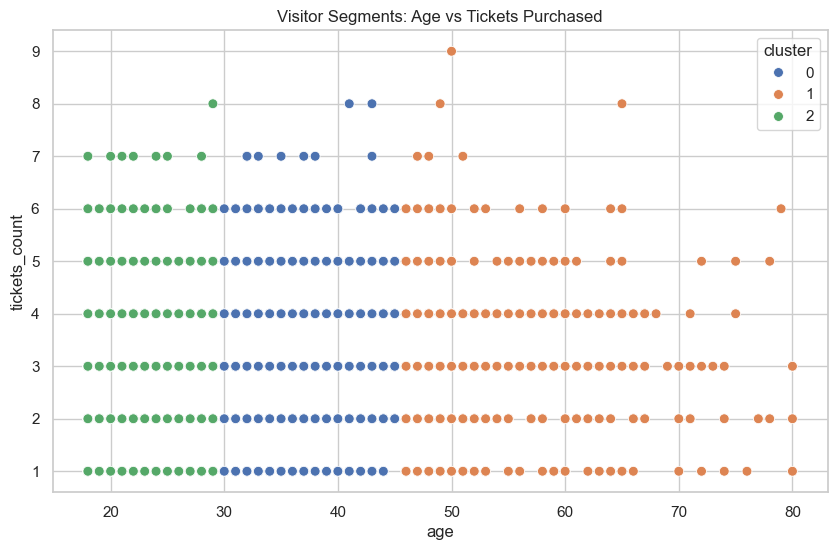

In [6]:
# Preprocessing for Clustering
le_country = LabelEncoder()
df['country_code'] = le_country.fit_transform(df['country'])

features = df[['age', 'country_code', 'tickets_count']]

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x='age', y='tickets_count', hue='cluster', palette='deep', s=50)
plt.title('Visitor Segments: Age vs Tickets Purchased')
plt.show()

## 4. Preference Prediction (Classification)
Training a model to predict the 'Preferred Event' for a new visitor.

In [7]:
# Encoding Target Variable
le_event = LabelEncoder()
df['event_code'] = le_event.fit_transform(df['event_selected'])

X = df[['age', 'country_code']]
y = df['event_code']

# Train Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
print("Classification Model Trained.")

Classification Model Trained.


## 5. Saving Artifacts
Saving models and encoders for the live application.

In [8]:
joblib.dump(clf, '../models/preference_model.pkl')
joblib.dump(le_country, '../models/le_country.pkl')
joblib.dump(le_event, '../models/le_event.pkl')
joblib.dump(kmeans, '../models/clustering_model.pkl')
print("All models saved successfully.")

All models saved successfully.
